# Mulit Linear Regression



In [ ]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR (2).csv


In [ ]:
#Loading data
cars_tc=pd.read_csv("ToyotaCorolla - MLR.csv")
cars_tc

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
#viewing columns from the dataset
cars_tc.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [ ]:
#display shape of the data. this shows total no of rows and columns in the dataset
cars_tc.shape

(1436, 11)

In [ ]:
#selecting only the required data
carsnew=cars_tc[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Weight"]]
carsnew.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170


In [ ]:
# To check the data types
carsnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   cc         1436 non-null   int64
 5   Doors      1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


## Rename columns to make data more sensible

In [ ]:
#rename columns
carsnew = carsnew.rename(columns={'Age_08_04':'Age','cc':'Cubic_Capacity'})

In [ ]:
carsnew.head()

,Price,Age,KM,HP,Cubic_Capacity,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170


## Check for missing values

In [ ]:
carsnew.isna().sum()

,0
Price,0
Age,0
KM,0
HP,0
Cubic_Capacity,0
Doors,0
Gears,0
Weight,0


In [ ]:
#check for duplicate values
carsnew[carsnew.duplicated()]

,Price,Age,KM,HP,Cubic_Capacity,Doors,Gears,Weight
113,24950,8,13253,116,2000,5,5,1320


In [ ]:
#drop duplicates
carsnew=carsnew.drop_duplicates()

In [ ]:
#Review the updated dataset
carsnew.head()

,Price,Age,KM,HP,Cubic_Capacity,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170


## Correlation Matrix

In [ ]:
carsnew.corr()

,Price,Age,KM,HP,Cubic_Capacity,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,0.087143
Cubic_Capacity,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,1.000000


## Scatterplot between variables along with histograms

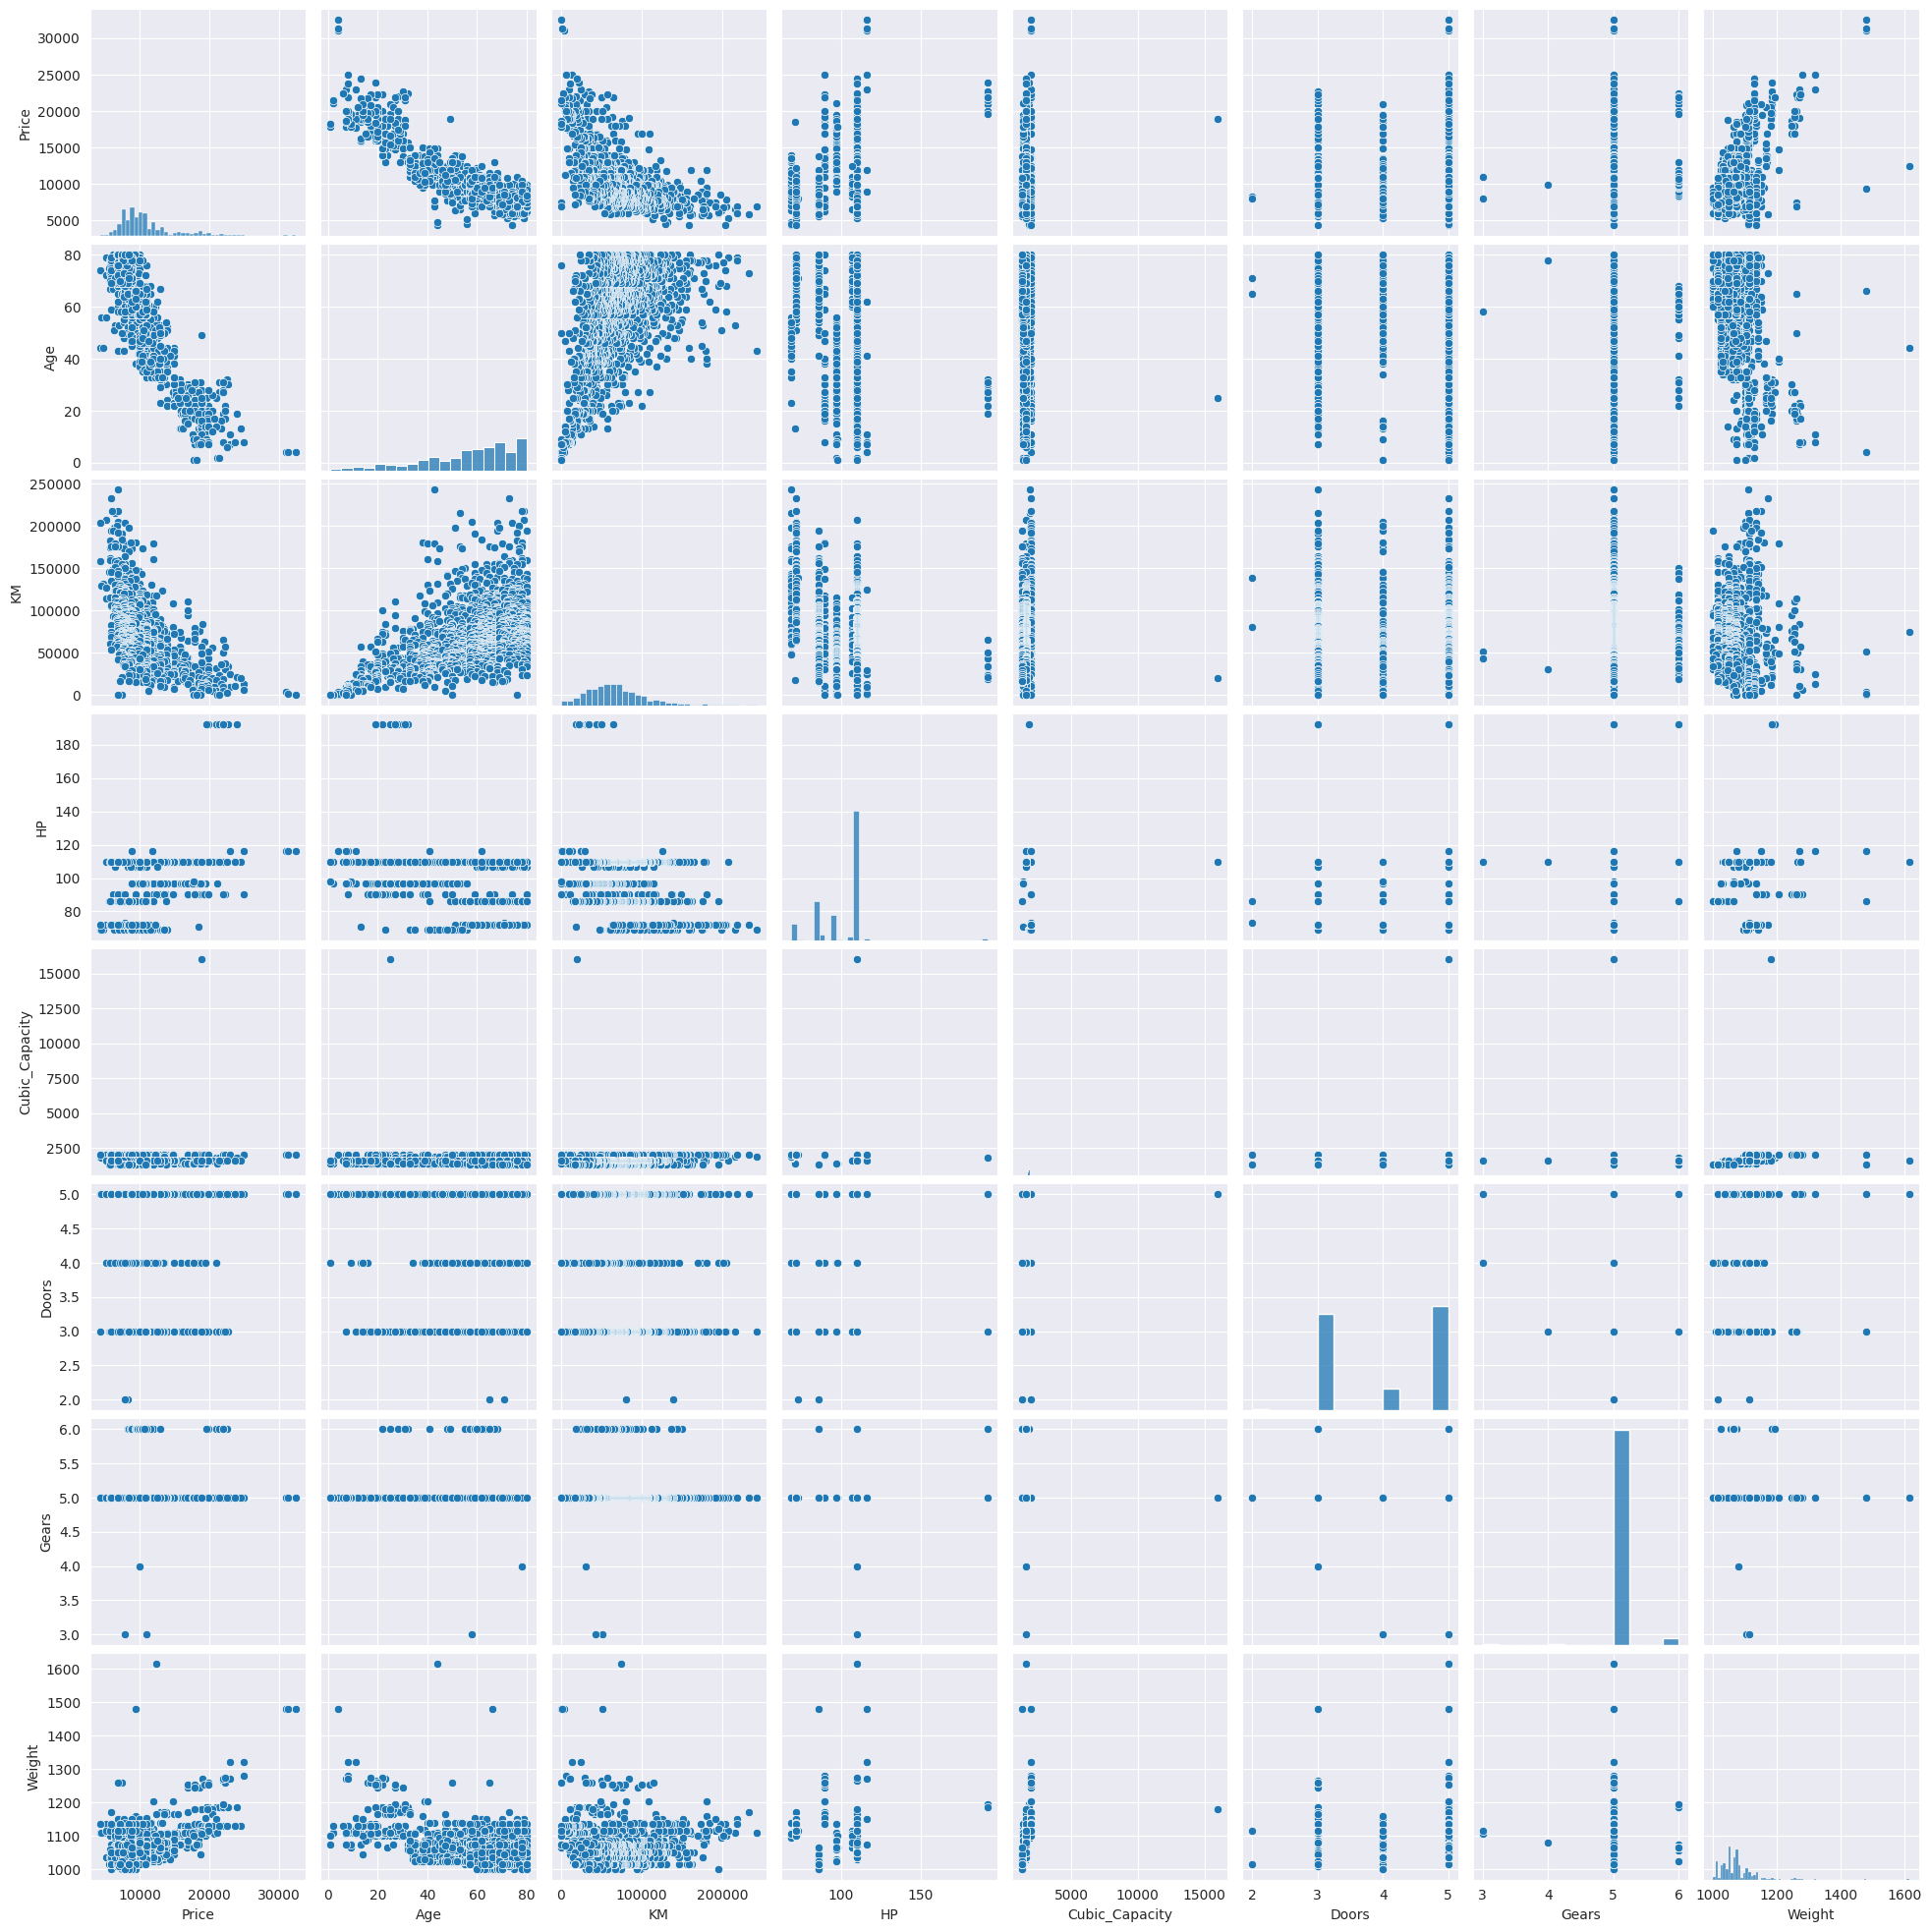

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(carsnew)

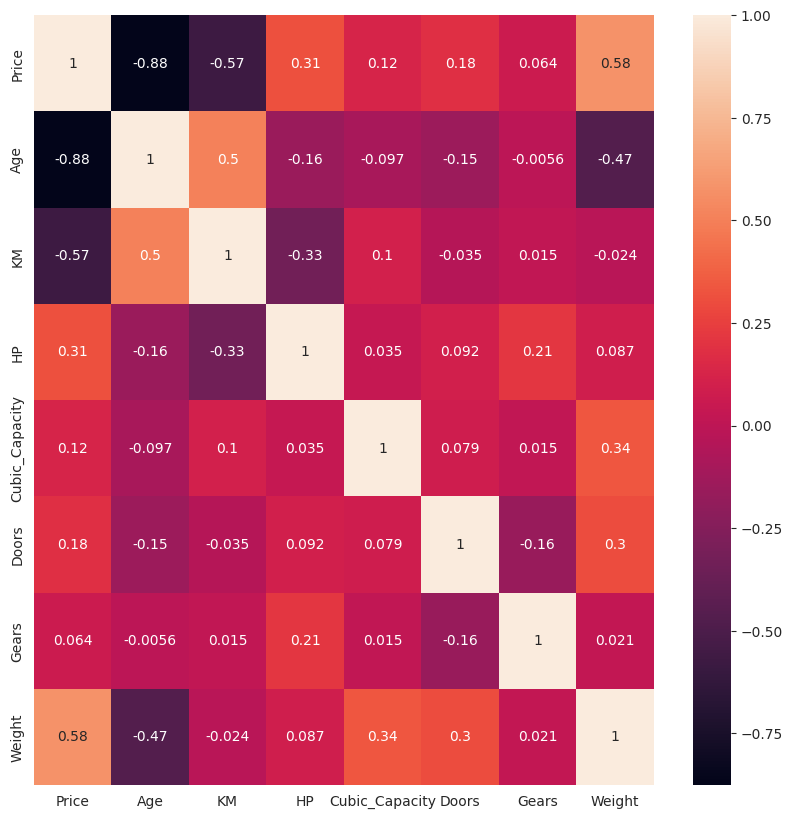

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(carsnew.corr(),cmap='rocket',annot=True);

## Preparing a model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
carsnew.columns

Index(['Price', 'Age', 'KM', 'HP', 'Cubic_Capacity', 'Doors', 'Gears',
       'Weight'],
      dtype='object')

## Creating a model

In [ ]:
model=smf.ols('Price ~ Age+KM+HP+Cubic_Capacity+Doors+Gears',data=carsnew).fit()
model

## Finding the coefficients, P_value, t_value and R_squared value

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1062.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:30:04   Log-Likelihood:                -12572.
No. Observations:                1435   AIC:                         2.516e+04
Df Residuals:                    1428   BIC:                         2.519e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.119e+04   1167.571      9.582      0.000    8897.584    1.35e+04
Age             -149.8834      2.619    -57.238      0.000    -155.020    -144.747
KM                -0.0136      0.001     -9.996      0.000      -0.016      -0.011
HP                31.7027      3.004     10.553      0.000      25.810      37.595
Cubic_Capacity     0.4669      0.099      4.729      0.000       0.273       0.661
Doors            210.8740     44.440      4.745      0.000     123.699     298.049
Gears            805.7003    226.692      3.554      0.000     361.016    1250.385
==============================================================================
Omnibus:                      410.365   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3172.449
Skew:                           1.112   Prob(JB):                         0.00
Kurtosis:                       9.936   Cond. No.                     2.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Model

In [ ]:
model_1 = smf.ols('Price ~ Cubic_Capacity',data=carsnew).fit()
print(model_1.pvalues,'\n',model_1.summary())

Intercept         7.236022e-114
Cubic_Capacity     2.292856e-06
dtype: float64 
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           2.29e-06
Time:                        12:34:52   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [ ]:
model_2=smf.ols('Price ~ Doors',data=carsnew).fit()
print(model_2.pvalues,'\n',model_2.summary())

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64 
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           2.40e-12
Time:                        12:35:06   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [ ]:
model_3=smf.ols('Price ~ Gears',data=carsnew).fit()
print(model_3.pvalues,'\n',model_3.summary())

Intercept    0.071254
Gears        0.015590
dtype: float64 
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.863
Date:                Sun, 08 Sep 2024   Prob (F-statistic):             0.0156
Time:                        12:35:18   Log-Likelihood:                -13787.
No. Observations:                1435   AIC:                         2.758e+04
Df Residuals:                    1433   BIC:                         2.759e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

# Calculating VIF

In [ ]:
carsnew.columns

Index(['Price', 'Age', 'KM', 'HP', 'Cubic_Capacity', 'Doors', 'Gears',
       'Weight'],
      dtype='object')

In [ ]:
rsq_Age = smf.ols('Age~KM+HP+Cubic_Capacity+Doors+Gears',data=carsnew).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+Cubic_Capacity+Doors+Gears',data=carsnew).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+Cubic_Capacity+Doors+Gears',data=carsnew).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_Cubic_Capacity = smf.ols('Cubic_Capacity~Age+KM+HP+Doors+Gears',data=carsnew).fit().rsquared
vif_Cubic_Capacity = 1/(1-rsq_Cubic_Capacity)

rsq_Doors = smf.ols('Doors~Age+KM+HP+Cubic_Capacity+Gears',data=carsnew).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+Cubic_Capacity+Doors',data=carsnew).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

#Storing vif values in a dataframe
df = {'Variables':['Age','KM','HP','Cubic_Capacity','Doors','Gears'],'VIF':[vif_Age,vif_KM,vif_HP,vif_Cubic_Capacity,vif_Doors,vif_Gears]}
Vif_df=pd.DataFrame(df)
Vif_df

,Variables,VIF
0,Age,1.415440
1,KM,1.550823
2,HP,1.213239
3,Cubic_Capacity,1.051577
4,Doors,1.073675
5,Gears,1.094652


# Residual Analysis

### Test for Normality of Residuals (QQ Plot)

In [ ]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

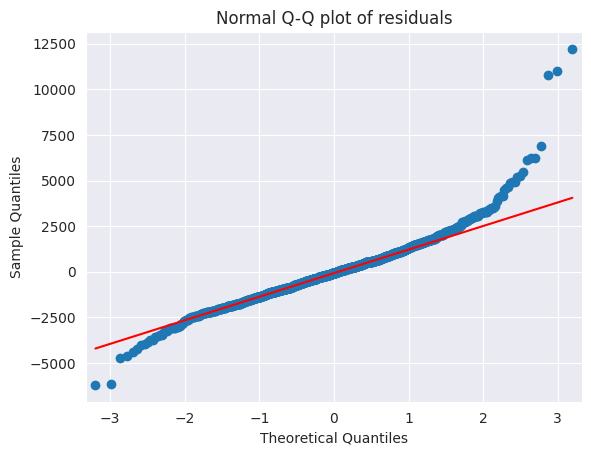

In [ ]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')

In [ ]:
list(np.where(model.resid>6000))

[array([ 91, 109, 110, 111, 114, 146, 522])]

## Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

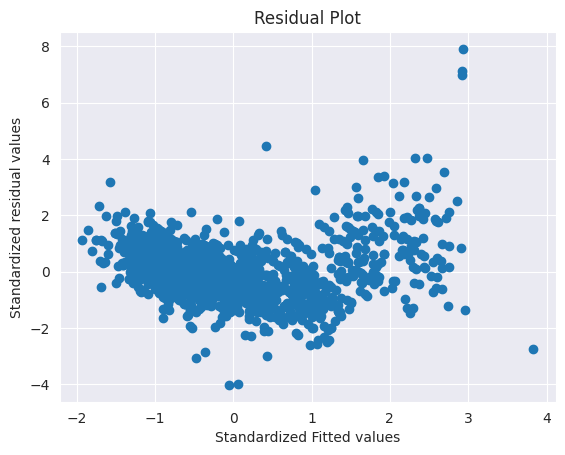

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# To test for Errors or Residual and Regressor

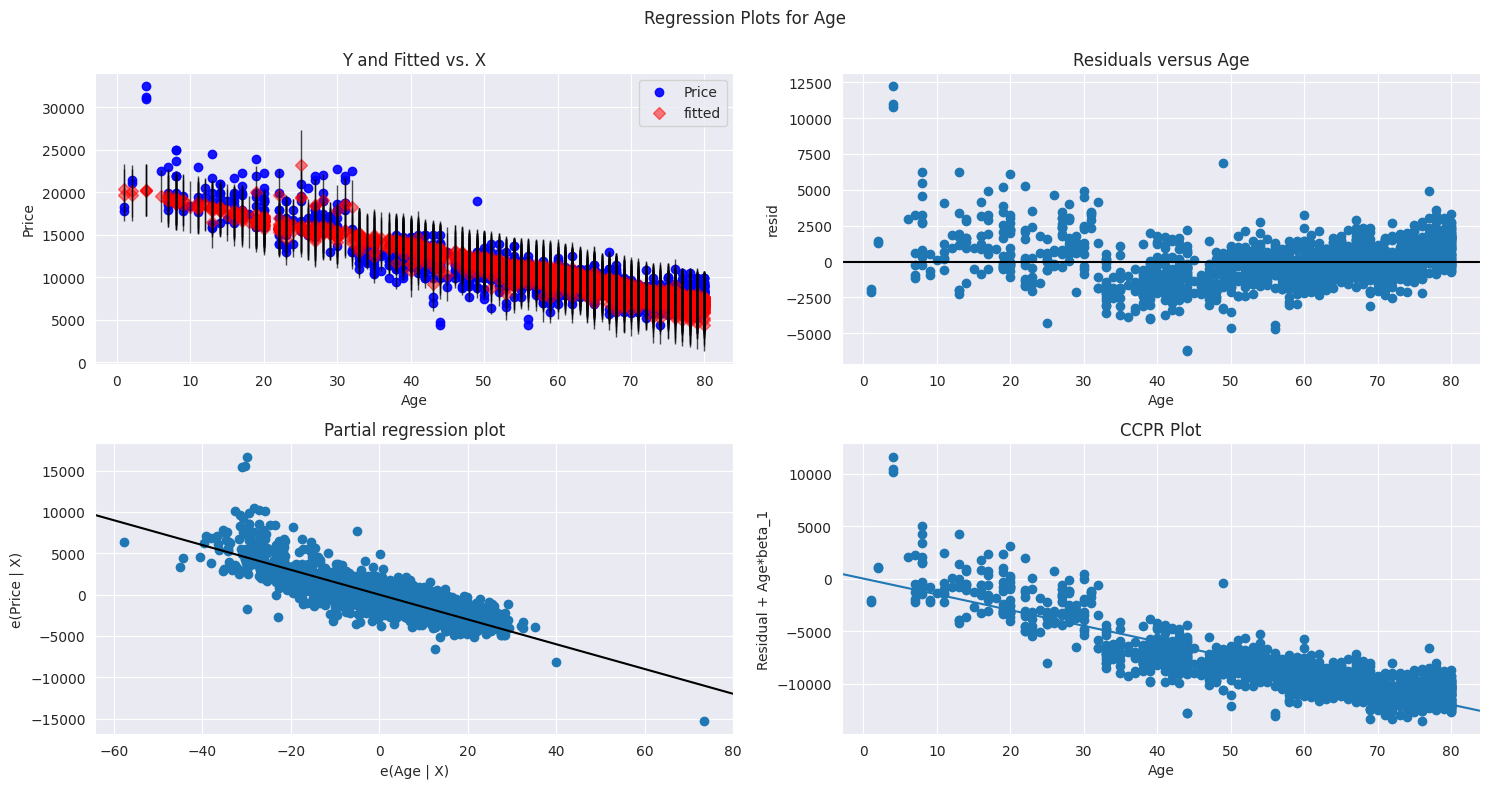

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

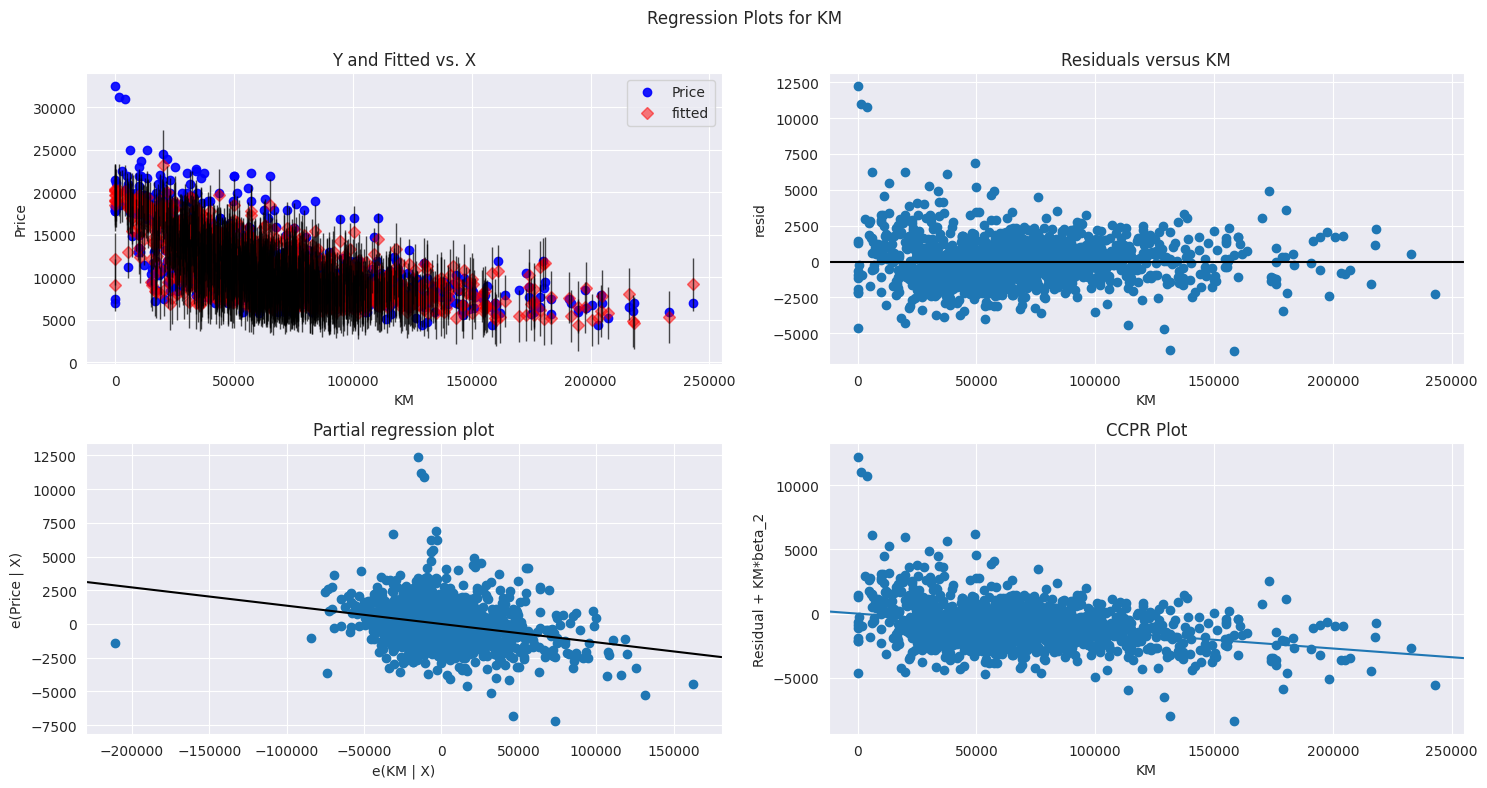

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

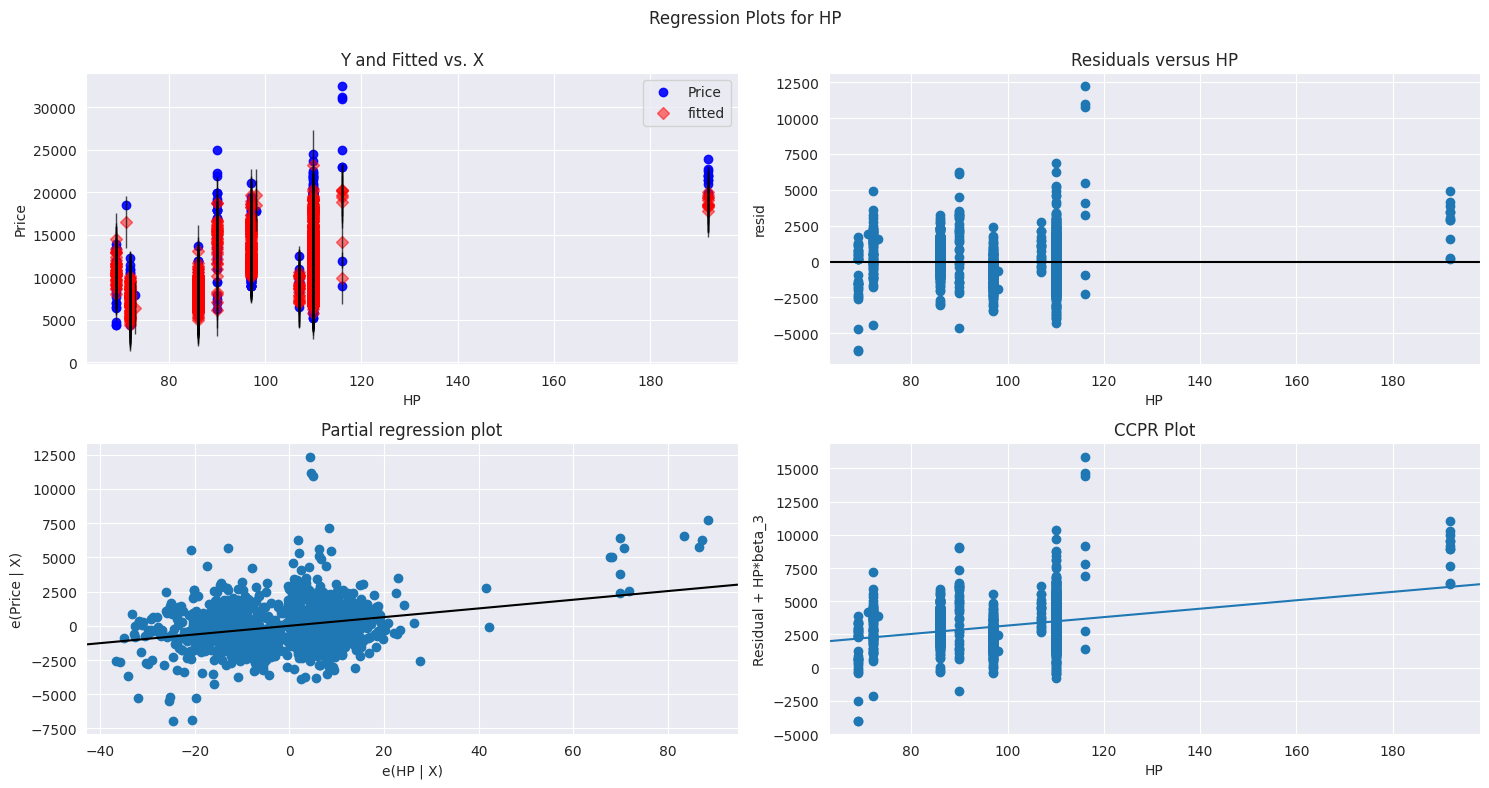

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

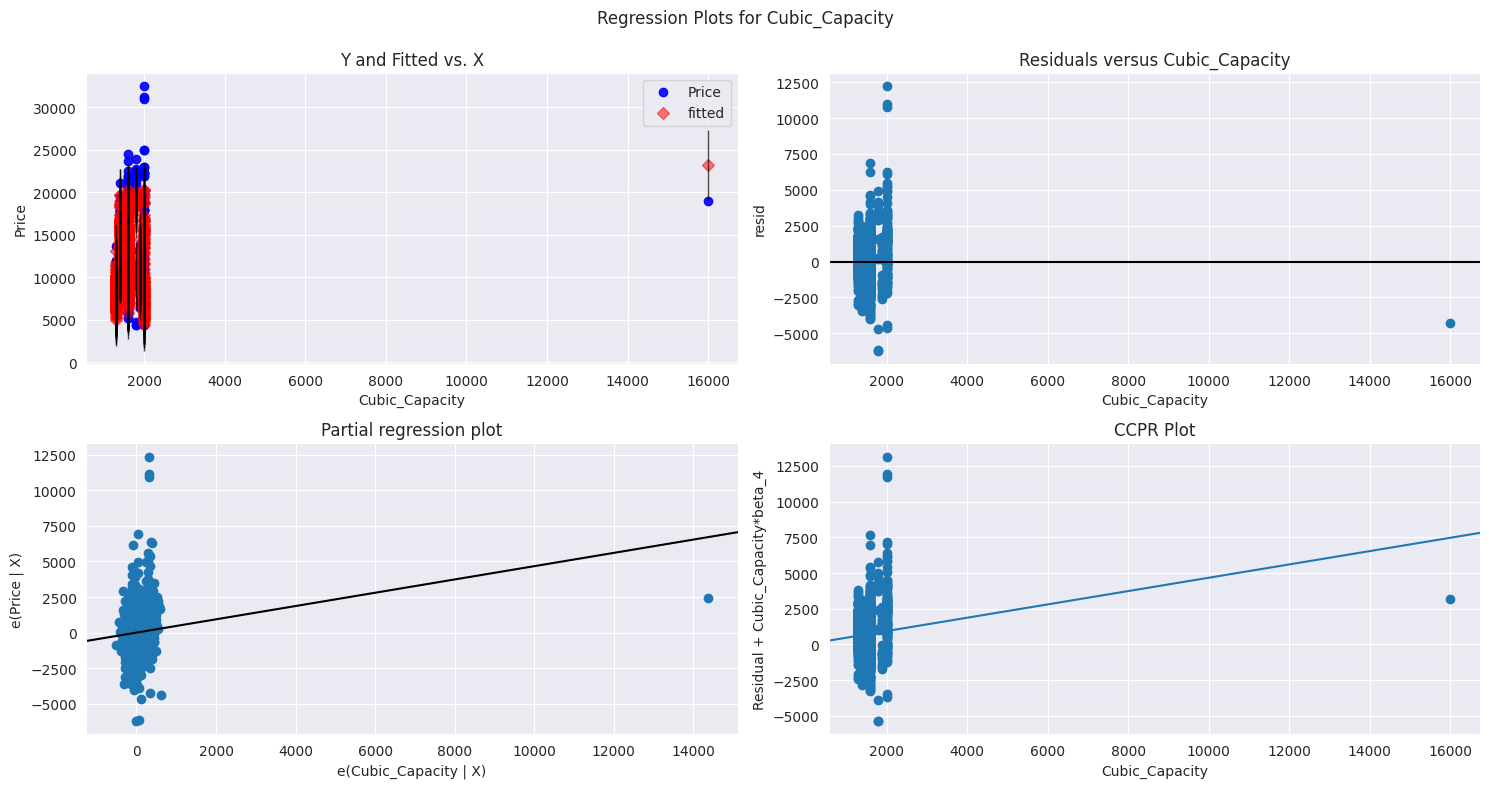

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Cubic_Capacity',fig=fig)
plt.show()

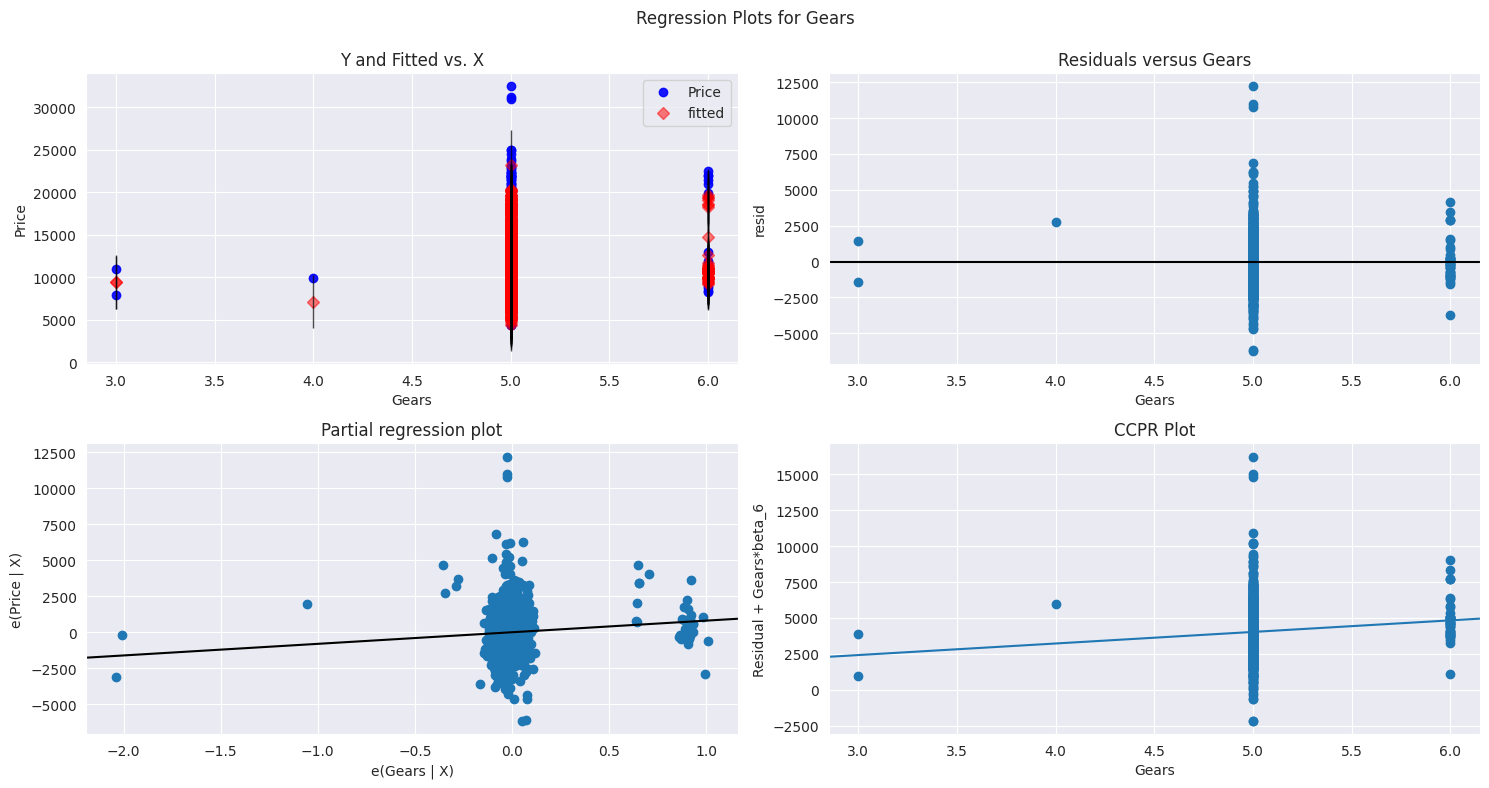

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

# Model Detection Diagnostics

### Detecting Influencers and outliers

### 1. Cook's Distance

In [ ]:
model_influence=model.get_influence()
(c, _) = model_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

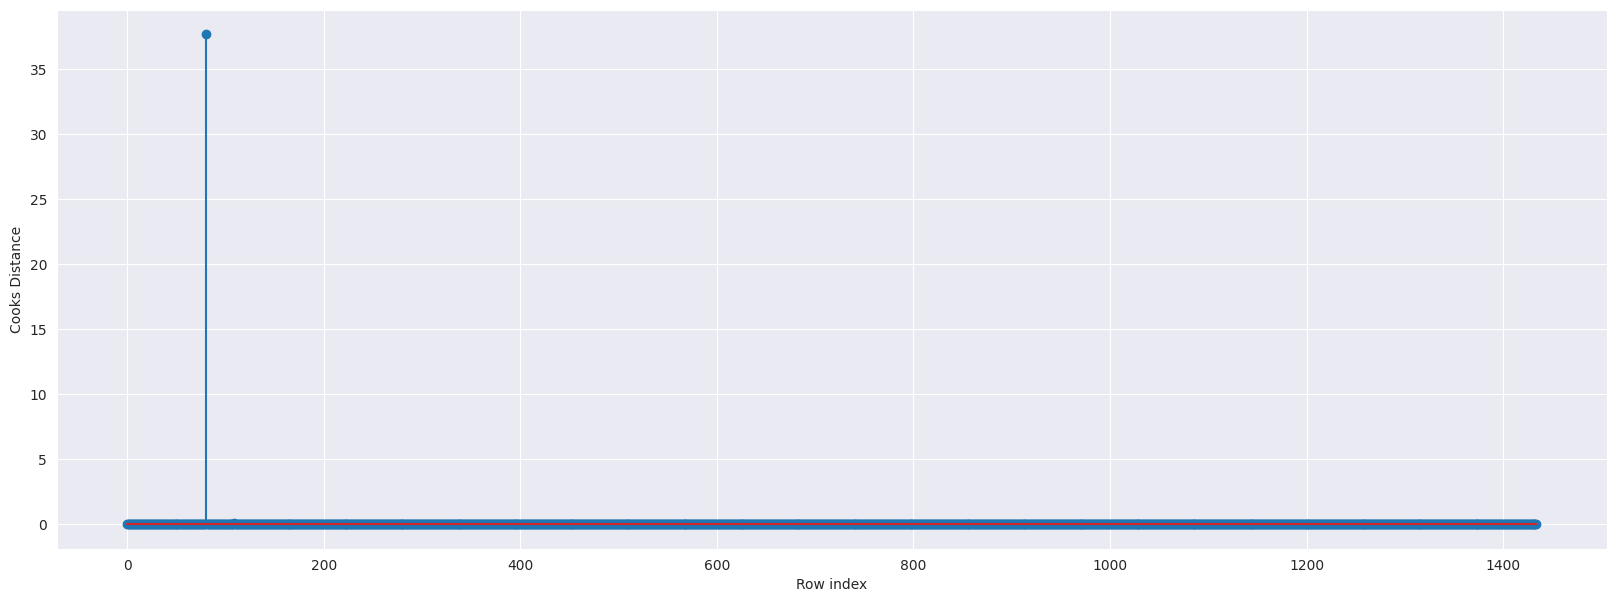

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(carsnew)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [ ]:
#index and value of influencer where c > 0.5
np.argmax(c),np.max(c)

(80, 37.69489440009096)

### 2. High Influence plots

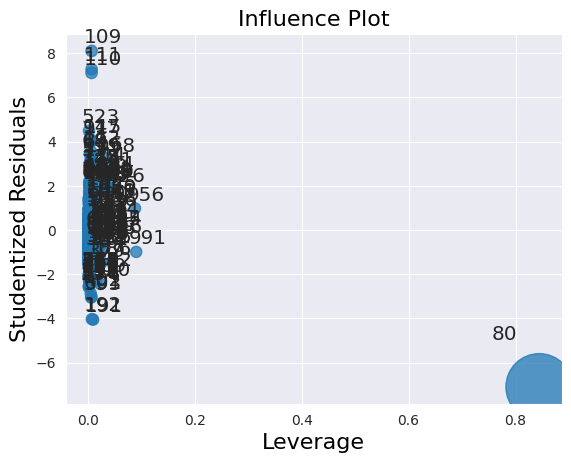

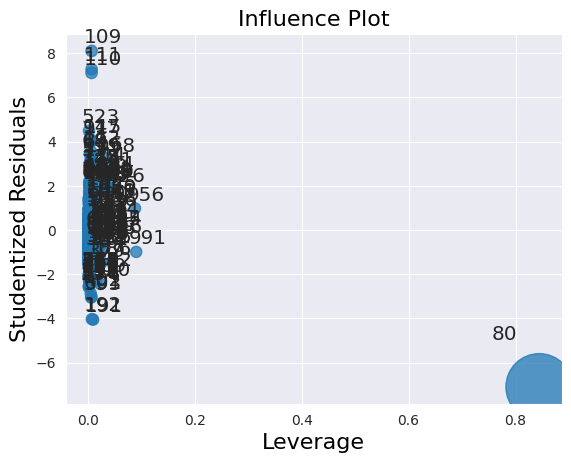

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

In [ ]:
# Leverage cutoff value
# Where K= No. of features/Columns & n= No. of data points
k = carsnew.shape[1]
n = carsnew.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.018815331010452963

From the above plot, it is evident that data point 80 is the influencer



In [ ]:
carsnew[carsnew.index.isin([80])]

,Price,Age,KM,HP,Cubic_Capacity,Doors,Gears,Weight
80,18950,25,20019,110,16000,5,5,1180


# Improving the Model

In [ ]:
# Creating a copy of data so that original dataset is not affected
cars_new=carsnew.copy()
cars_new

,Price,Age,KM,HP,Cubic_Capacity,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,1025
1432,10845,72,19000,86,1300,3,5,1015
1433,8500,71,17016,86,1300,3,5,1015
1434,7250,70,16916,86,1300,3,5,1015


In [ ]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
cars2=cars_new.drop(cars_new.index[[80]],axis=0).reset_index(drop=True)
cars2

,Price,Age,KM,HP,Cubic_Capacity,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,1025
1430,10845,72,19000,86,1300,3,5,1015
1431,8500,71,17016,86,1300,3,5,1015
1432,7250,70,16916,86,1300,3,5,1015


## Model Deletion Diagnostics and Final Model

In [ ]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+Cubic_Capacity+Doors+Gears',data=cars2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    cars2=cars2.drop(cars2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    cars2
else:
    final_model=smf.ols('Price~Age+KM+HP+Cubic_Capacity+Doors+Gears',data=cars2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8253714538468366


In [ ]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age+KM+HP+Cubic_Capacity+Doors+Gears',data=cars2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    cars2=cars2.drop(cars2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    cars2
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+KM+HP+Cubic_Capacity+Doors+Gears',data=cars2 ).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8253714538468366


In [ ]:
final_model.rsquared

0.8253714538468366

## Model Prediction

In [ ]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':15,"KM":50000,"HP":90,"Cubic_Capacity":1200,"Doors":4,"Gears":5},index=[0])
new_data

,Age,KM,HP,Cubic_Capacity,Doors,Gears
0,15,50000,90,1200,4,5


In [ ]:
# Manual Prediction of Price
final_model.predict(new_data)

,0
0,15849.057867


In [ ]:
# Automatic Prediction of Price
pred_y=final_model.predict(cars2)
pred_y

,0
0,16128.392822
1,15672.008841
2,16077.675142
3,15680.102836
4,15273.230180
...,...
1428,8514.101790
1429,8110.797747
1430,8289.174913
1431,8434.419352
